In [1]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from __future__ import absolute_import, division, print_function, unicode_literals


import numpy as np
import os


In [2]:
print(tf.__version__)
print(keras.__version__)

2.3.0
2.4.0


In [14]:
# mnist
mnist = tf.keras.datasets.mnist

# x_train에는 총 60000개의 28 x 28 크기의 이미지가 담겨 있다.
# y_train에는 x_train의 60000개에 대한 값 ( 0 ~ 9 )이 담겨있는 레이블 데이터 셋이다
# x_test와 y_test은 각각 10000개의 이미지와 레이블 데이터 셋이다. 
# x_train 과 y_train을 통해 모델을 학습하고 난 뒤에 x_test, y_test를 이용해 학습된 모델의 정확도를 평가.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


# 이는 총 4개의 레이어로 구성된 신경망이다.




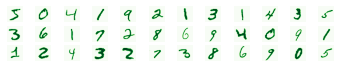

In [39]:
plt.figure(figsize=(6, 1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(x_train[i],cmap=plt.cm.Greens)
    plt.axis("off") # 각 축 없애는거
plt.show()

In [40]:
y_train[:36]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5], dtype=uint8)

In [46]:
# 모형 클래스 객체 생성

# 1번째 레이어는 입력 이미지의 크기가 28×28이므로 이를 1차원 텐서로 펼치는 것

# 2번째 레이어는 1번째 레이어에서 제공되는 784 개의 값(28×28)을 입력받아 128개의 값으로 인코딩해 주는데, 
# 활성함수로 ReLU를 사용하도록 하였다.
# 2번째 레이어의 실제 연산은 1번째 레이어에서 제공받은 784개의 값을 784×128 행렬과 곱하고
# 편향값을 더하여 얻은 128개의 출력값을 다시 ReLU 함수에 입력해 얻은 128개의 출력이다.

#3번째 레이어에 입력되어 충 10개의 값을 출력하는데, 여기서 사용되는 활성화 함수는 Softmax가 사용
# Softmax는 마지막 레이어의 결과값을 다중분류를 위한 확률값으로 해석할 수 있도록 하기 위함이다.
# 10개의 값을 출력하는 이유는 입력 이미지가 0~9까지의 어떤 숫자를 의미하는지에 대한
# 각각의 확률을 얻고자 함이다.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [53]:
# layers 속성으로 각 레이어의 특성 확인
l2=model.layers[1]
l3=model.layers[2]

print(l2.name, type(l2), l2.output_shape, l2.activation.__name__, l2.count_params())
print(l3.name, type(l3), l3.output_shape, l3.activation.__name__, l3.count_params())

dense_8 <class 'tensorflow.python.keras.layers.core.Dense'> (None, 128) relu 100480
dense_9 <class 'tensorflow.python.keras.layers.core.Dense'> (None, 10) softmax 1290


In [54]:
# 모델의 학습 중에 역전파를 통한 가중치 최적화를 위해 기울기 방향에 대한 경사하강을 위한 방법으로 Adam을 사용
# 손실 함수로 다중 분류의 Cross Entropy인 sparse_categorical_crossentropy를 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)



Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0156 - accuracy: 0.9947
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0107 - accuracy: 0.9967
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0109 - accuracy: 0.9965
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0086 - accuracy: 0.9975
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0079 - accuracy: 0.9977
313/313 - 0s - loss: 0.0979 - accuracy: 0.9767


[0.09787969291210175, 0.9767000079154968]

In [55]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 0s - loss: 0.0979 - accuracy: 0.9767


[0.09787969291210175, 0.9767000079154968]